In [1]:
#importing libraries for data cleanindg and pre-processing
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_csv('spam_ham_dataset.csv',encoding='ISO-8859–1') # loading data set 
df1.head() # show first 5 records 

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [61]:
df1.shape
# shows no. of rows and columns in csv file

(4993, 5)

In [9]:
df1=df1.drop(columns=['label_num'])

In [10]:
df1.sample(5)

,label,text
2713,ham,Subject: re : heads - up - tenaska iv partner ...
3128,spam,Subject: the situation is right under your own...
475,ham,Subject: neon discussion january 31\r\nhere is...
4627,ham,Subject: training resources and cost to attend...
2158,ham,Subject: meter 7268 nov allocation\r\nfyi .\r\...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
# removing columns which are not required for analysis
df1['label'] = encoder.fit_transform(df1['label'])

In [16]:
df1.head()

,label,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [17]:
# missing values
df1.isnull().sum()

label    0
text     0
dtype: int64

In [21]:
# check for duplicate values
df1.duplicated().sum()

178

In [23]:
# remove duplicates
df1 = df1.drop_duplicates(keep='first')

In [24]:
df1.duplicated().sum()

0

In [26]:
df1.shape

(4993, 2)

## 2 EDA 

In [27]:
df1['label'].value_counts() # count no. of ham and spam values

0    3531
1    1462
Name: label, dtype: int64

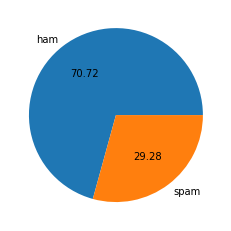

In [28]:
# for creating a pie chart 
import matplotlib.pyplot as plt
plt.pie(df1['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
# data in unbalanced 

In [29]:
import nltk

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saumya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
# number of characters
df1['num_char'] = df1['text'].apply(len)

In [36]:
df1.head()

,label,text,num_char
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524
3,1,"Subject: photoshop , windows , office . cheap ...",414
4,0,Subject: re : indian springs\r\nthis deal is t...,336


In [37]:
# number of words
df1['num_words'] = df1['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [38]:
df1.head()

,label,text,num_char,num_words
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551
3,1,"Subject: photoshop , windows , office . cheap ...",414,49
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71


In [40]:
#number of sentences
df1['num_sentences'] = df1['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [41]:
df1.head()

,label,text,num_char,num_words,num_sentences
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,3
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,24
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3


In [42]:
df1[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,13.386942
std,1547.863387,340.702932,27.959959
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,4.000000
50%,557.000000,125.000000,7.000000
75%,1262.000000,288.000000,15.000000
max,32258.000000,8863.000000,1204.000000


In [44]:
# ham
df1[df1['label'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,11.662419
std,1402.785831,337.018933,25.330035
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,4.000000
50%,538.000000,128.000000,7.000000
75%,1253.500000,298.500000,13.500000
max,32258.000000,8863.000000,1204.000000


In [46]:
#spam
df1[df1['label'] == 1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,17.551984
std,1840.112883,349.439381,33.111447
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,4.000000
50%,589.000000,119.500000,9.000000
75%,1305.000000,252.750000,19.000000
max,22073.000000,3963.000000,693.000000


In [47]:
# importing seaborn for data visualisation
import seaborn as sns

<AxesSubplot:xlabel='num_char', ylabel='Count'>

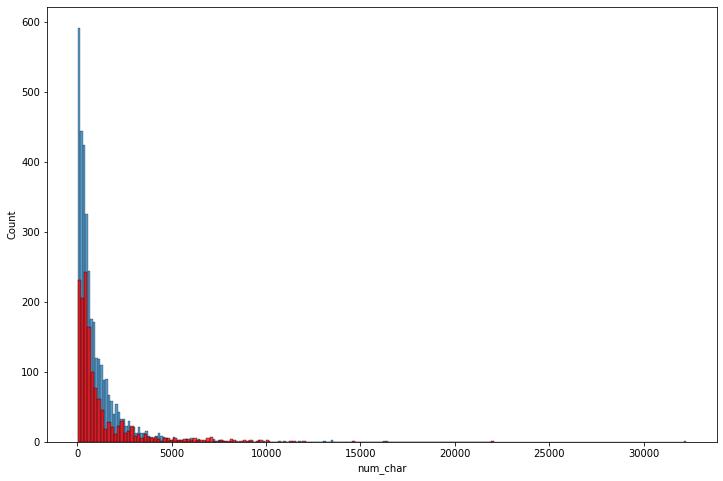

In [55]:
# histogram of 'num_char'
plt.figure(figsize=(12,8))
sns.histplot(df1[df1['label'] == 0]['num_char'])
sns.histplot(df1[df1['label'] == 1]['num_char'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

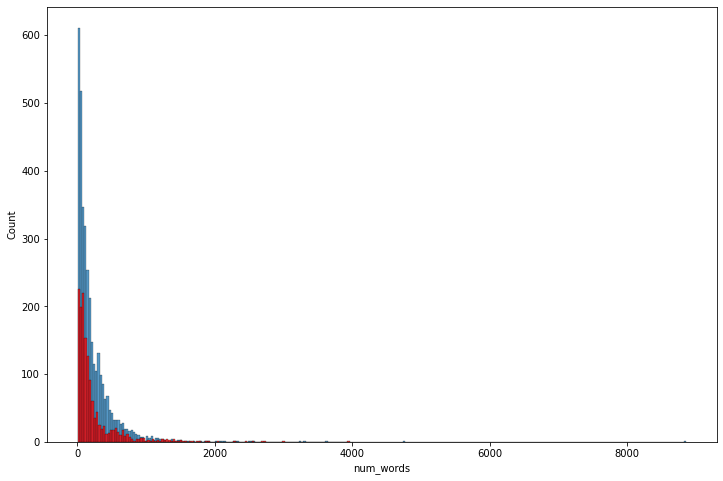

In [57]:
# histogram of 'num_words'
plt.figure(figsize=(12,8))
sns.histplot(df1[df1['label'] == 0]['num_words'])
sns.histplot(df1[df1['label'] == 1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

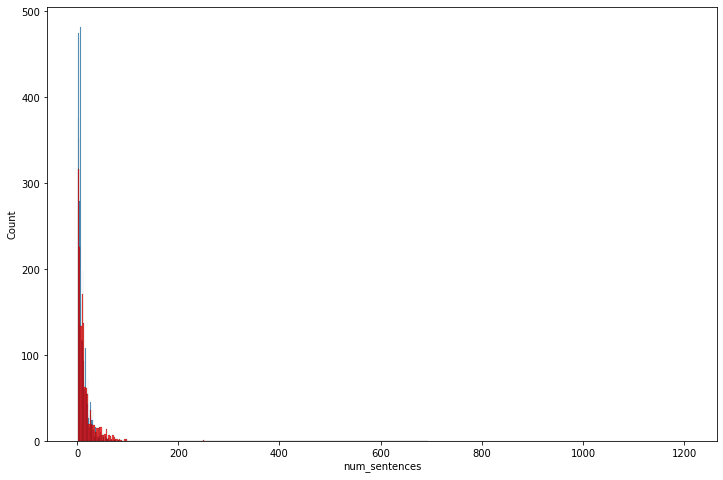

In [60]:
# histogram of 'num_sentences'
plt.figure(figsize=(12,8))
sns.histplot(df1[df1['label'] == 0]['num_sentences'])
sns.histplot(df1[df1['label'] == 1]['num_sentences'],color='red')

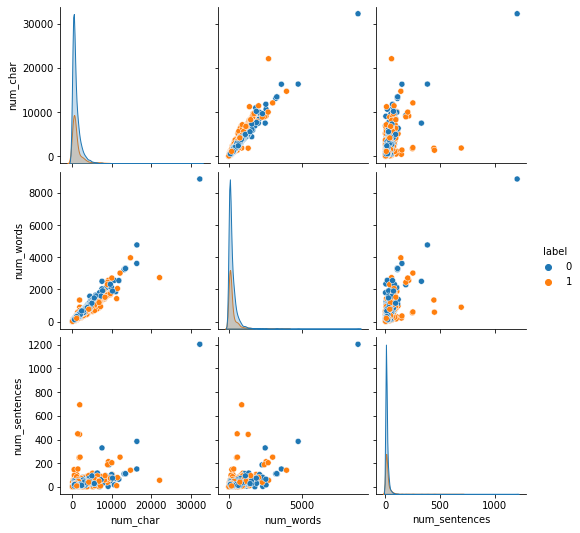

In [58]:
sns.pairplot(df1,hue='label')
#  to understand the best set of features to explain a relationship between two variables

<AxesSubplot:>

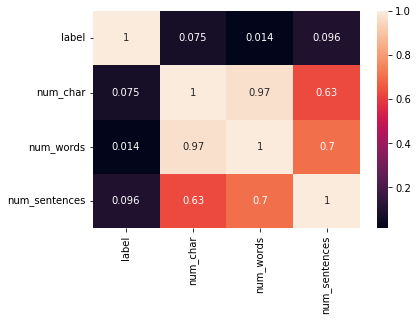

In [59]:
sns.heatmap(df1.corr(),annot=True) # correlation matrix